**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

**Importing Data**

In [ ]:
df=pd.read_csv('Final_DataSet_40k.csv', index_col='date', parse_dates=['date'])
df['Close']=df['close'].shift(-1,fill_value=0)
df.drop(df.tail(1).index,inplace=True)
df = df.drop(columns=['close'])


**Data Partitioning**

In [ ]:
train_size = int(len(df)*0.85)
validation_size= int(len(df)*0.9)
train_dataset,validation_dataset,test_dataset = df.iloc[:train_size],df.iloc[train_size:validation_size],df.iloc[validation_size:]

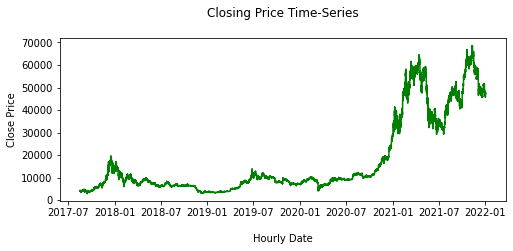

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df.Close, color='green')
plt.xlabel('\nHourly Date')
plt.ylabel('Close Price')
plt.title('Closing Price Time-Series\n')
plt.show()

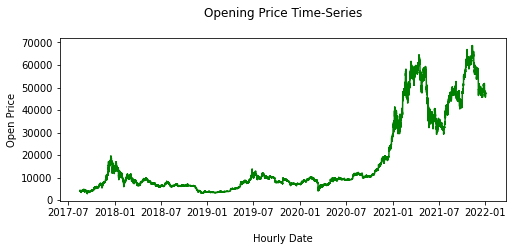

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df.open[1:], color='green')
plt.xlabel('\nHourly Date')
plt.ylabel('Open Price')
plt.title('Opening Price Time-Series\n')
plt.show()

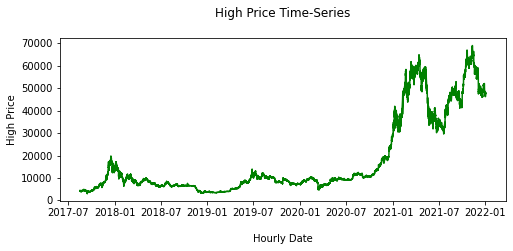

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df.high[1:], color='green')
plt.xlabel('\nHourly Date')
plt.ylabel('High Price')
plt.title('High Price Time-Series\n')
plt.show()

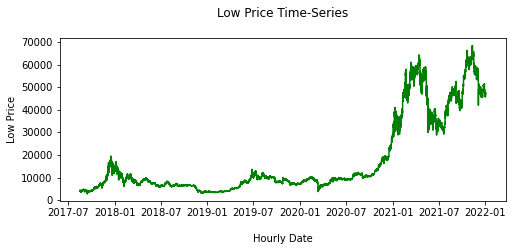

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df['low'], color='green')
plt.xlabel('\nHourly Date')
plt.ylabel('Low Price')
plt.title('Low Price Time-Series\n')
plt.show()

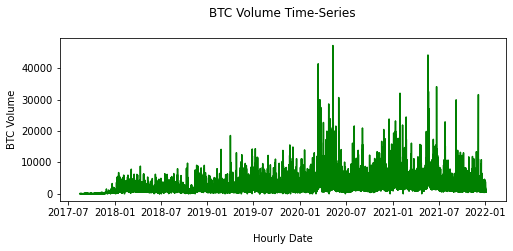

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df['Volume BTC'], color='green')
plt.xlabel('\nHourly Date')
plt.ylabel('BTC Volume')
plt.title('BTC Volume Time-Series\n')
plt.show()

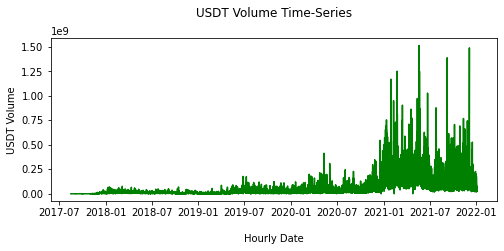

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df['Volume USDT'], color='green')
plt.xlabel('\nHourly Date')
plt.ylabel('USDT Volume')
plt.title('USDT Volume Time-Series\n')
plt.show()

**Plotting Data**

Volume of all data:  9999
Volume of train data:  6999
Volume of validation data: 2000
Volume of test data:  1000


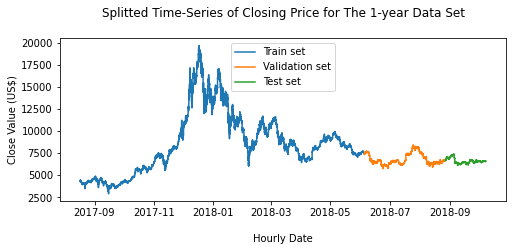

In [ ]:
plt.figure(figsize = (8, 3))
plt.rcParams['figure.dpi'] = 360
plt.plot(train_dataset.Close)
plt.plot(validation_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('\nHourly Date')
plt.ylabel('Close Value (US$)')
plt.title('Splitted Time-Series of Closing Price for The 1-year Data Set\n')
plt.legend(['Train set', 'Validation set', 'Test set'], loc='upper center', prop={'size':10})
print('Volume of all data: ',len(df))
print('Volume of train data: ', len(train_dataset))
print('Volume of validation data:', len(validation_dataset))
print('Volume of test data: ', len(test_dataset))

**Data Normalization**

DO NOT USE THIS WAY TO NORMALIZE DATA FOR MODELS!!!

In [ ]:
df_norm = df.copy()
scaler = MinMaxScaler(feature_range=(0,1))

df_norm['Close'] = scaler.fit_transform(df[['Close']])
df_norm['open'] = scaler.fit_transform(df_norm[['open']])
df_norm['high'] = scaler.fit_transform(df_norm[['high']])
df_norm['low'] = scaler.fit_transform(df_norm[['low']])
df_norm['Volume BTC'] = scaler.fit_transform(df_norm[['Volume BTC']])
df_norm['Volume USDT'] = scaler.fit_transform(df_norm[['Volume USDT']])

**Plotting Normalized Data**

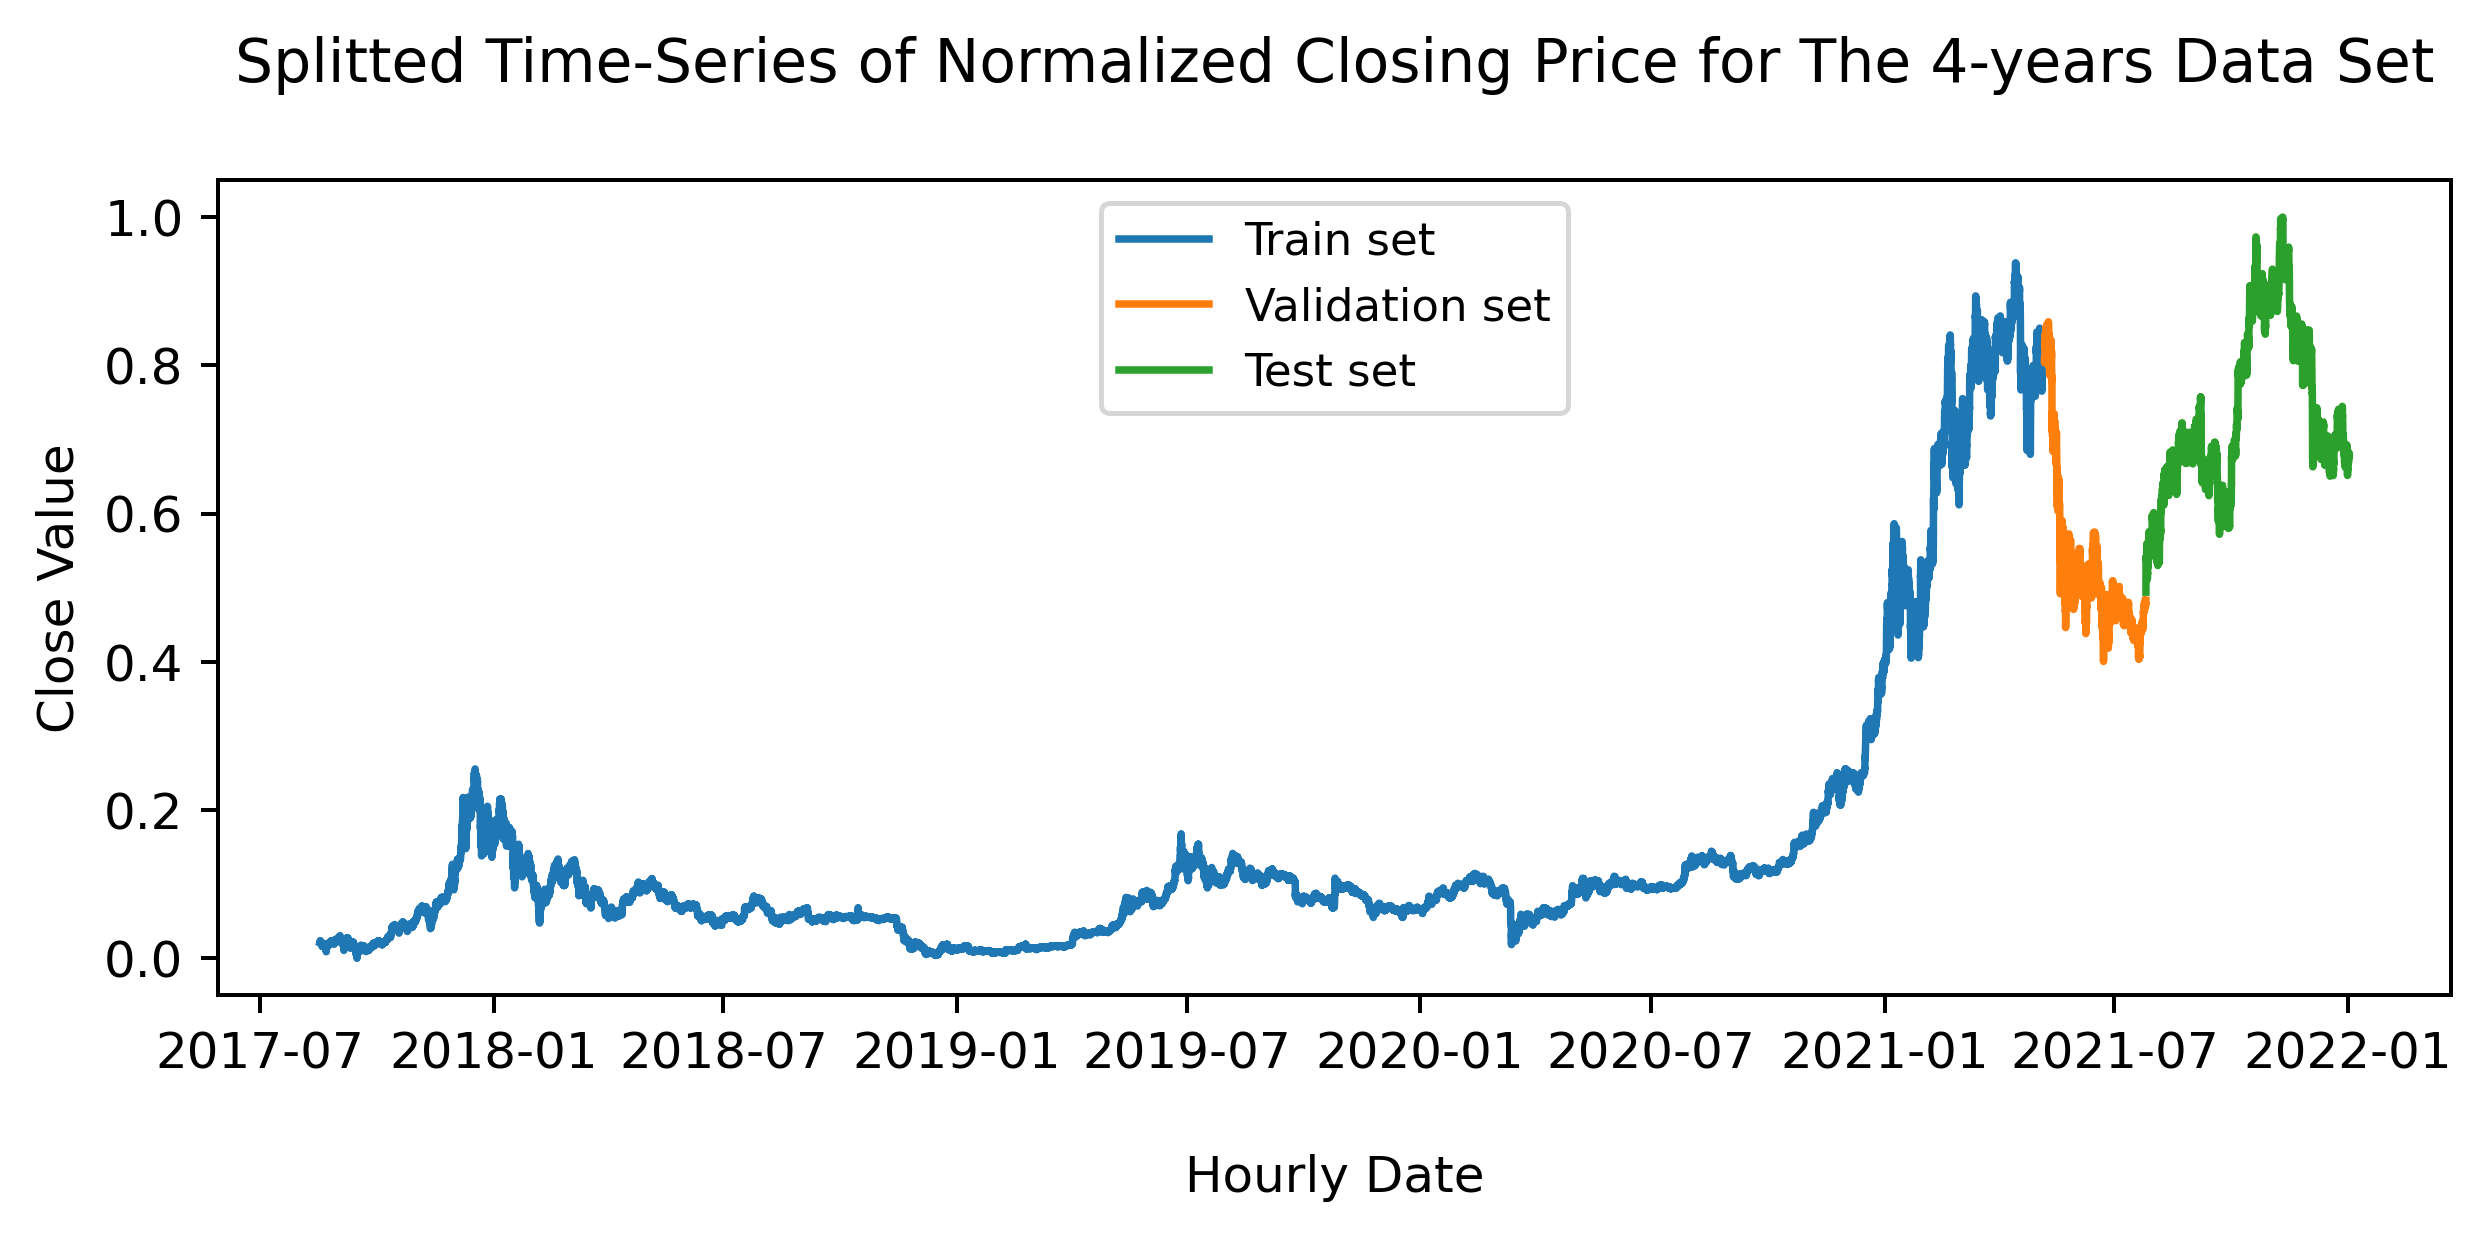

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(df_norm.Close[:train_size])
plt.plot(df_norm.Close[train_size:validation_size])
plt.plot(df_norm.Close[validation_size:])
plt.xlabel('\nHourly Date')
plt.ylabel('Close Value')
plt.title('Splitted Time-Series of Normalized Closing Price for The 4-years Data Set\n')
plt.legend(['Train set', 'Validation set', 'Test set'], loc='upper center', prop={'size':9})
plt.show()

**Plotting Normalized Training Data**

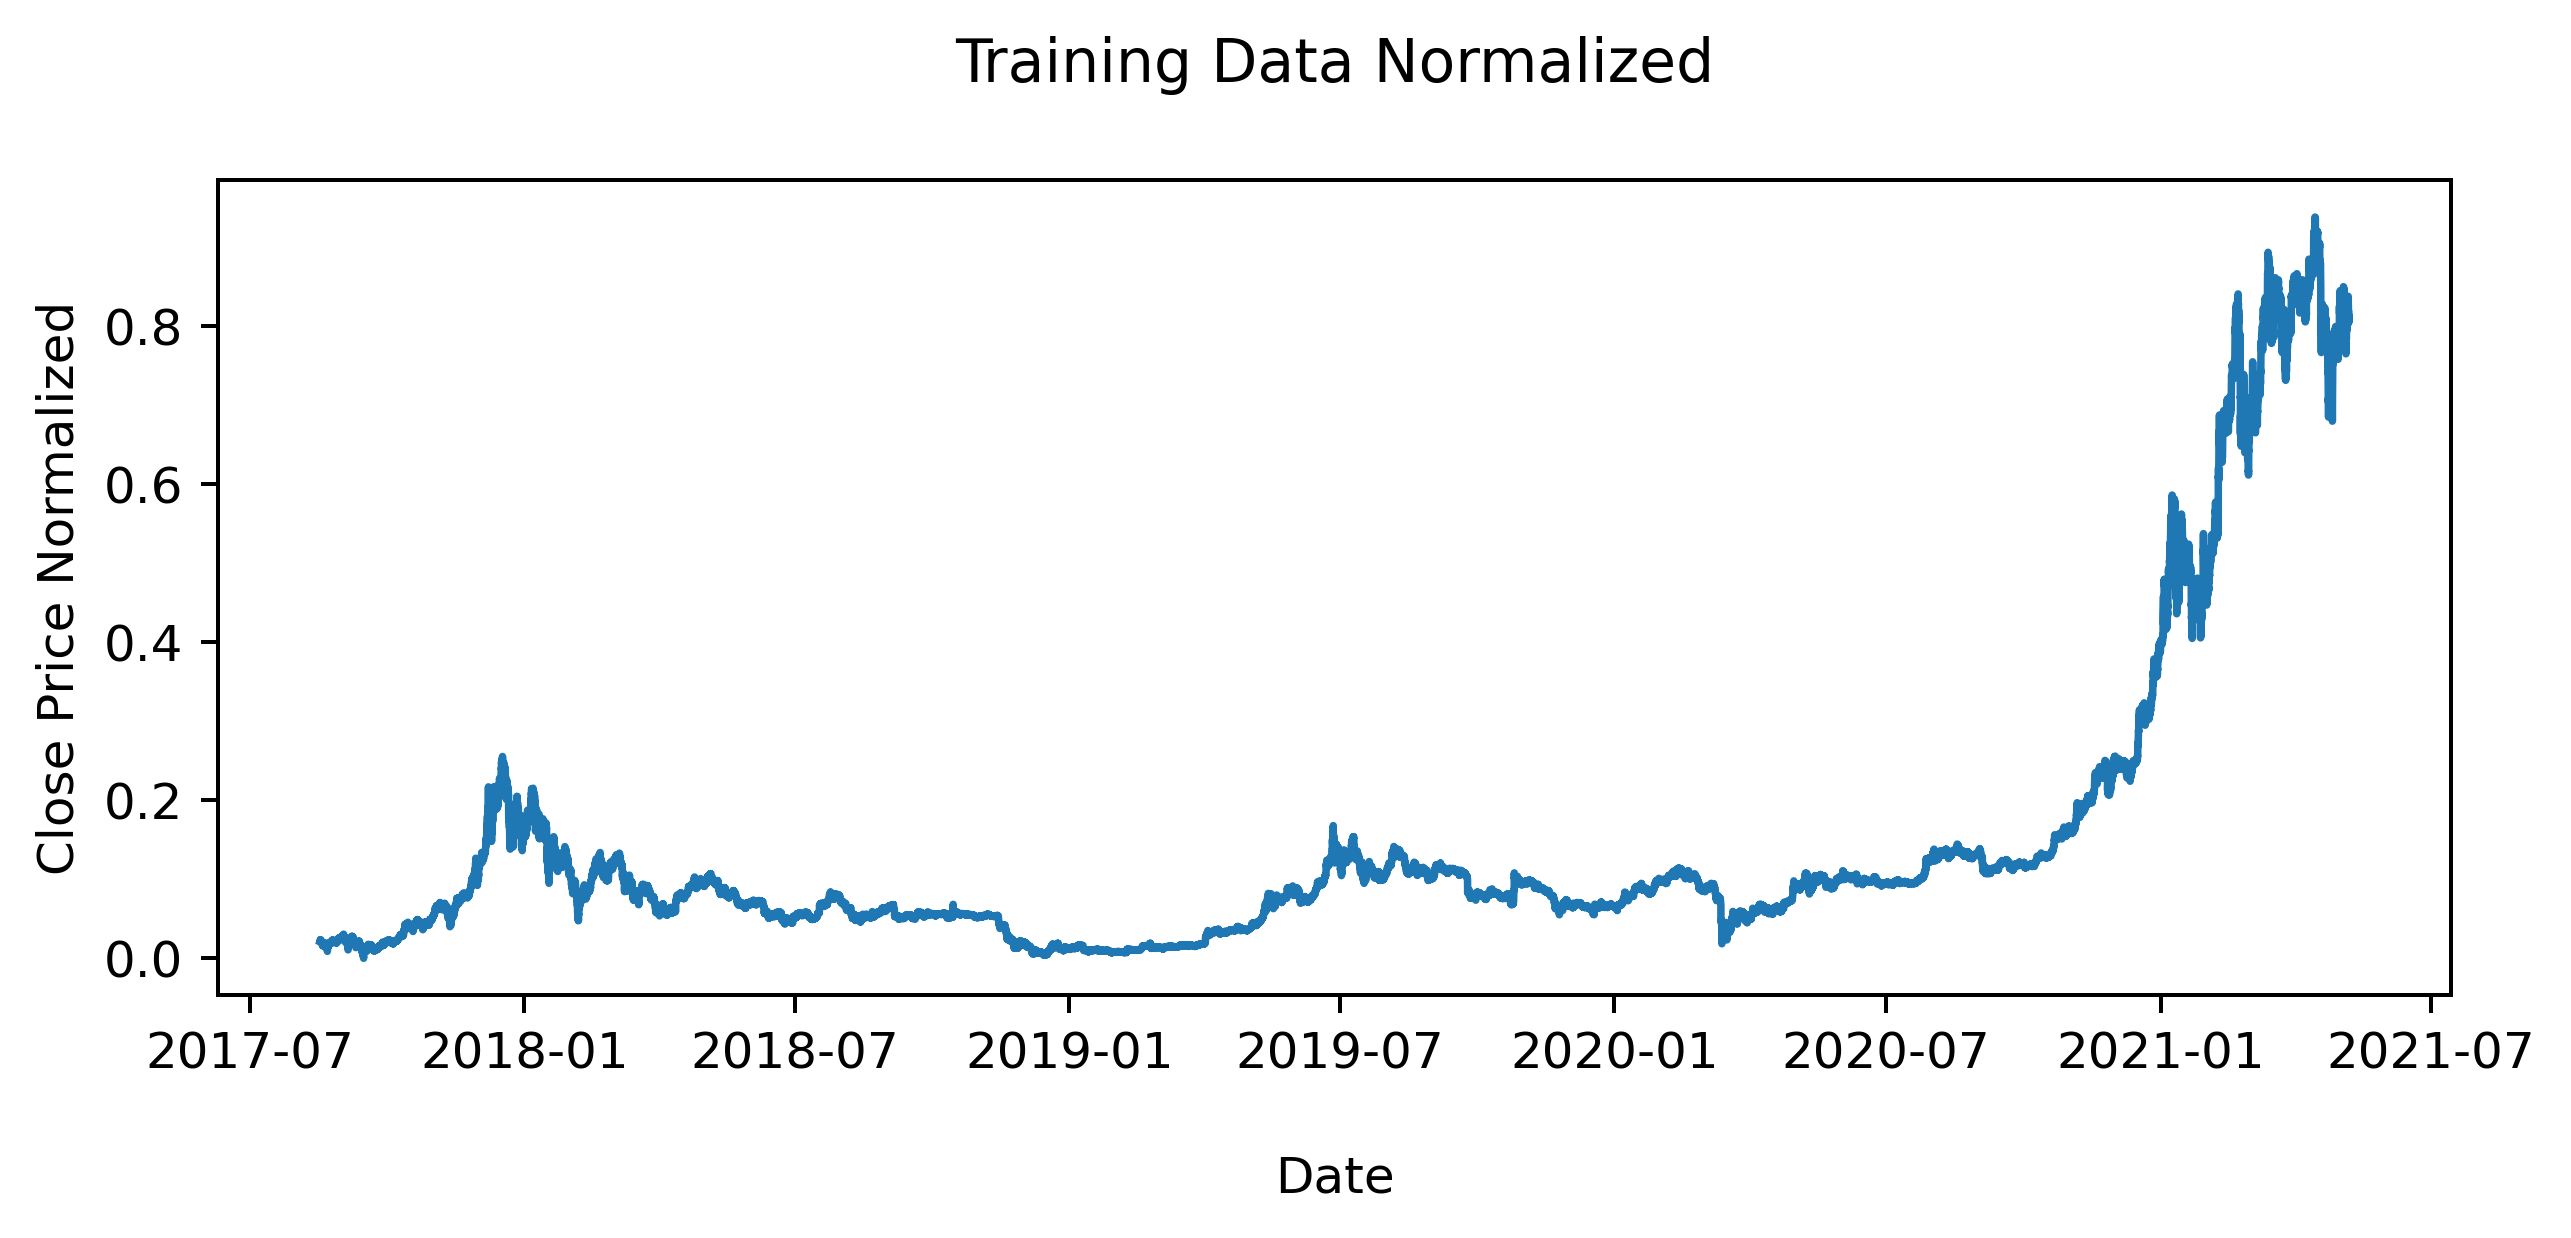

In [ ]:
plt.figure(figsize = (8, 3))
plt.rcParams['figure.dpi'] = 360
dataset_train = df_norm.iloc[:train_size]
plt.plot(dataset_train.Close)
plt.xlabel('\nDate')
plt.ylabel('Close Price Normalized')
plt.title('Training Data Normalized\n')
plt.show()

**Plotting Normalized Validation Data**

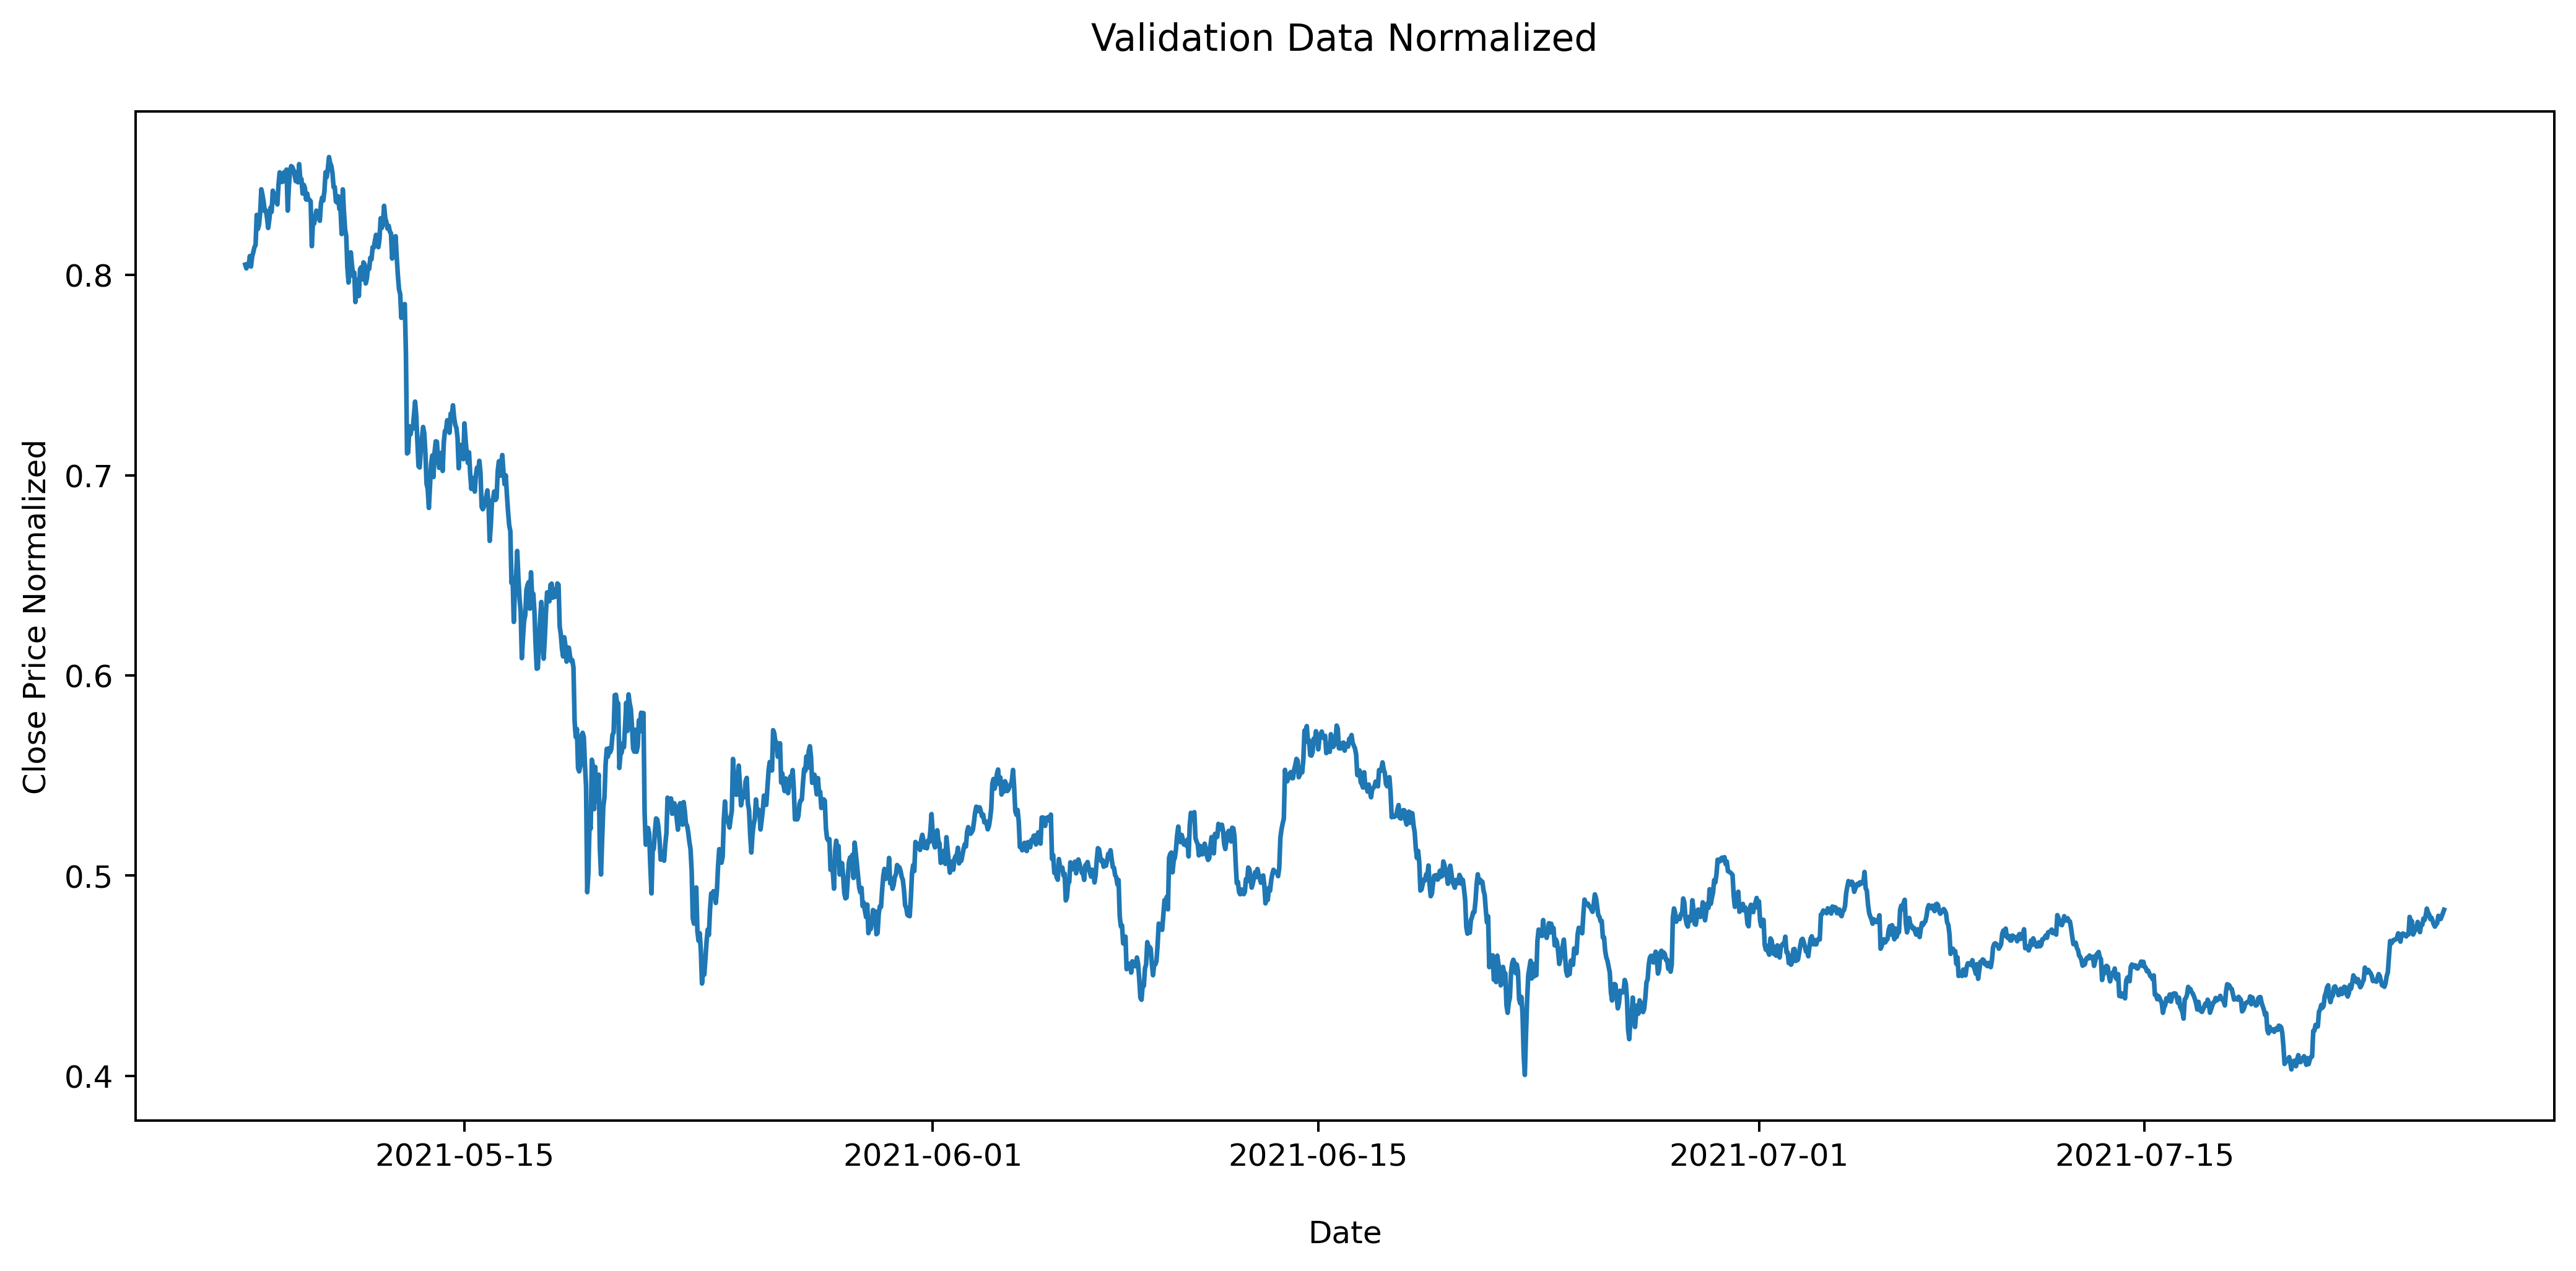

In [ ]:
fig = plt.figure(figsize=(14, 6))
dataset_validation = df_norm.iloc[train_size:validation_size]
plt.plot(dataset_validation.Close)
plt.xlabel('\nDate')
plt.ylabel('Close Price Normalized')
plt.title('Validation Data Normalized\n')
plt.show()

**Plotting Normalized Testing Data**

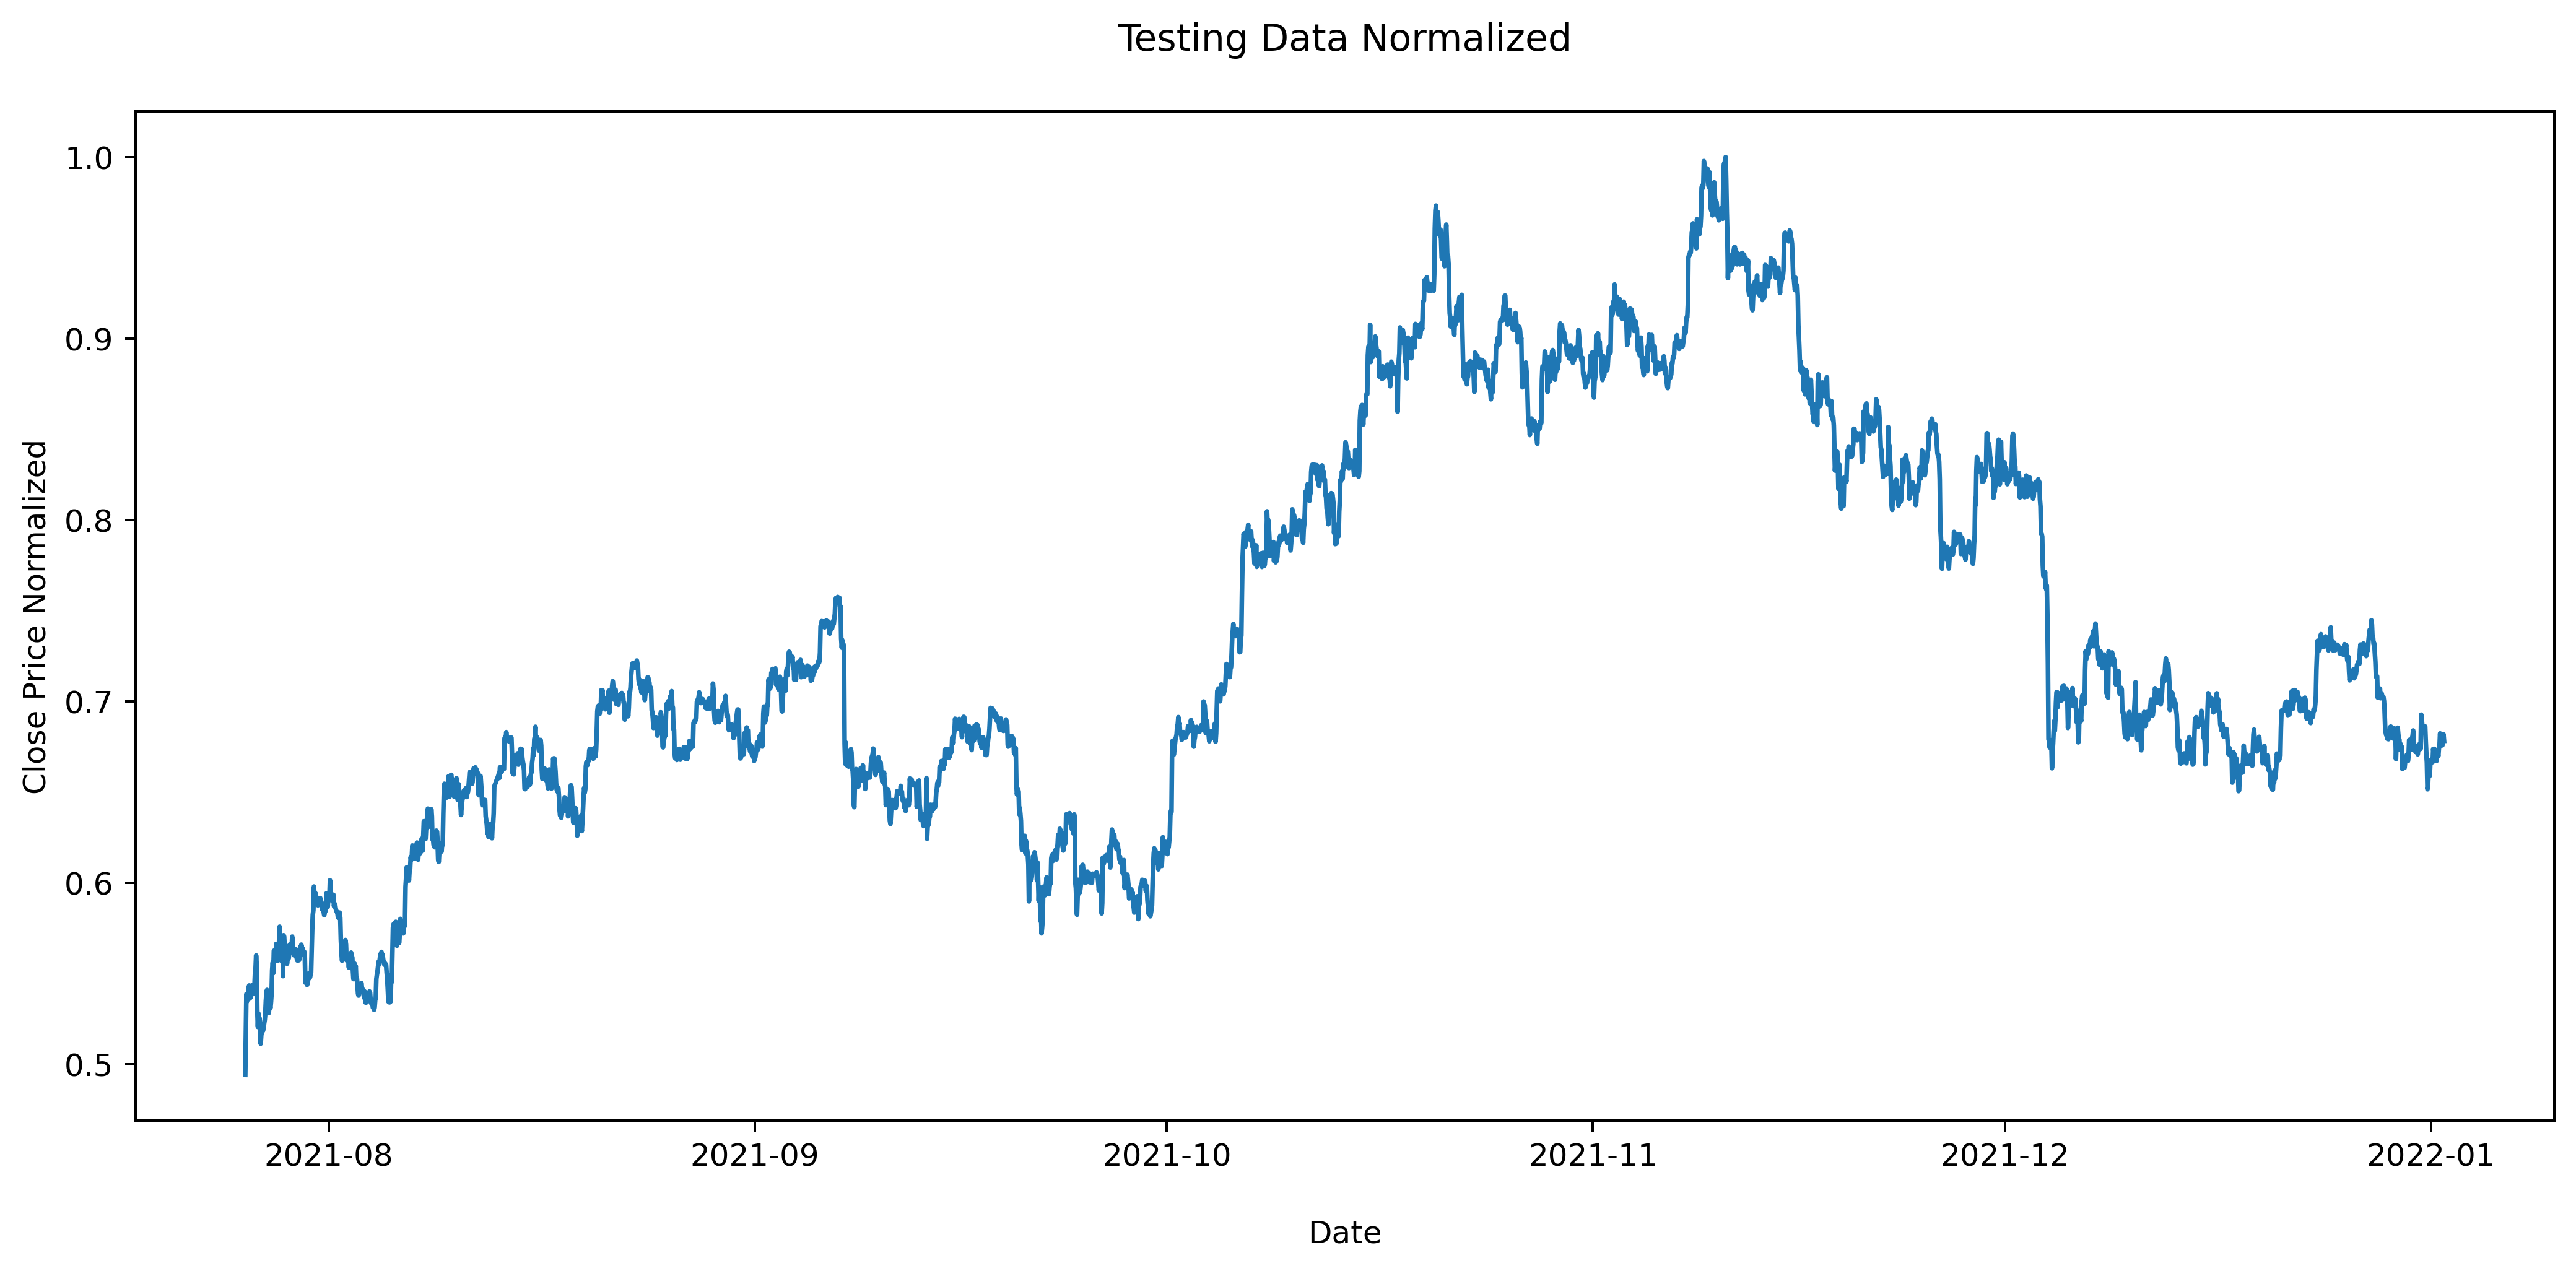

In [ ]:
fig = plt.figure(figsize=(14, 6))
dataset_test = df_norm.iloc[validation_size:]
plt.plot(dataset_test.Close)
plt.xlabel('\nDate')
plt.ylabel('Close Price Normalized')
plt.title('Testing Data Normalized\n')
plt.show()